<a href="https://colab.research.google.com/github/huskeypm/cellmigration/blob/main/TAM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tumor-associated macrophage
This is a reaction diffusion problem applied to model macrophage diffusion through a crowded matrix toward a tumor cell.

Simulations require nanopore code from Tom Pace (described elsewhere)

* For 3D, check out crowder_sims repo:  
 * https://bitbucket.org/huskeypm/crowder_sims/src/main/
* Execute from faust:
 * /home/pkekeneshuskey/source/crowder_sims
 * follow wiki instructions from http://10.73.6.50/mediawiki/index.php/Nanopore_code

* postprocess data
 * run globYaml to parse data
```
$ python globYamls.py  > nomev.csv
$ python globYamls.py  > wmev.csv
```
 * upload to this notebook and run


In [1]:
import matplotlib.pylab as plt
import pandas as pd

In [26]:
cols = pd.read_csv("nomev.csv",nrows=0).columns.tolist()
nomev = pd.read_csv("nomev.csv",header=None,skiprows=[0],names=cols)
wmev = pd.read_csv("wmev.csv",header=None,skiprows=[0],names=cols)


In [29]:
nomev

,case,crowder_potential,free_vol_fraction,sep_buffer,totconc_B,totconc_B_1000,totflux_A_1000,totflux_A_1100,totflux_A_pore,totflux_B_1000,totflux_B_1100,totflux_B_pore,totflux_C_1000,totflux_C_1100,totflux_C_pore,Unnamed: 15
0,/home/pkekeneshuskey/source/crowder_sims/solut...,0.0,0.977778,5.00,0.0,0.0,0.003415,0.000000,0.000000,0.0,0.0,0.0,0.004608,0.0,-0.002055,NaN
1,/home/pkekeneshuskey/source/crowder_sims/solut...,0.1,0.977778,5.00,0.0,0.0,0.003453,0.000000,0.000000,0.0,0.0,0.0,0.004935,0.0,-0.002166,NaN
2,/home/pkekeneshuskey/source/crowder_sims/solut...,0.2,0.977778,5.00,0.0,0.0,0.003453,0.000000,0.000000,0.0,0.0,0.0,0.004941,0.0,-0.002168,NaN
3,/home/pkekeneshuskey/source/crowder_sims/solut...,0.3,0.977778,5.00,0.0,0.0,0.003453,0.000000,0.000000,0.0,0.0,0.0,0.004934,0.0,-0.002166,NaN
4,/home/pkekeneshuskey/source/crowder_sims/solut...,0.0,0.893981,0.75,0.0,0.0,0.002716,0.000000,0.000001,0.0,0.0,0.0,0.003402,0.0,-0.001492,NaN
5,/home/pkekeneshuskey/source/crowder_sims/solut...,0.1,0.893981,0.75,0.0,0.0,0.006365,-0.000004,0.000000,0.0,0.0,0.0,0.002823,-0.0,-0.001307,NaN
6,/home/pkekeneshuskey/source/crowder_sims/solut...,0.2,0.893981,0.75,0.0,0.0,0.010708,-0.000006,0.000002,0.0,0.0,0.0,-0.004324,0.0,0.001596,NaN
7,/home/pkekeneshuskey/source/crowder_sims/solut...,0.3,0.893981,0.75,0.0,0.0,0.013206,-0.000012,0.000097,0.0,0.0,0.0,-0.010309,-0.0,0.004157,NaN
8,/home/pkekeneshuskey/source/crowder_sims/solut...,0.0,0.887500,0.50,0.0,0.0,0.001863,-0.000000,0.000001,0.0,0.0,0.0,-0.000922,0.0,0.000339,NaN
9,/home/pkekeneshuskey/source/crowder_sims/solut...,0.0,0.887500,0.50,0.0,0.0,0.001863,-0.000000,0.000001,0.0,0.0,0.0,-0.000921,0.0,0.000339,NaN


In [50]:
import numpy as np

In [69]:


def PlotCase(df,key, title=None,referenceFlux=1.,color='k',tag=None):
  potentials=[0, 0.100000, 0.2, 0.3]
  for i, potential in enumerate( potentials ):
    sdf = df[df['crowder_potential'] == potential ]

    #plt.plot(sdf['free_vol_fraction'],sdf[key]/referenceFlux,
    #        color,lw=i+1,label="$\phi_{c}$=%3.1f,%s"%(potential,tag))
    plt.plot(1-sdf['free_vol_fraction'],sdf[key]/referenceFlux,
            color,lw=i+1,label="$\phi_{c}$=%3.1f,%s"%(potential,tag))
  plt.title(title)
  plt.ylabel("Normalized to {key}".format(key=key))
  #plt.xlabel("Free Vol Frac")
  plt.xlabel("Crowder density")





0.003415


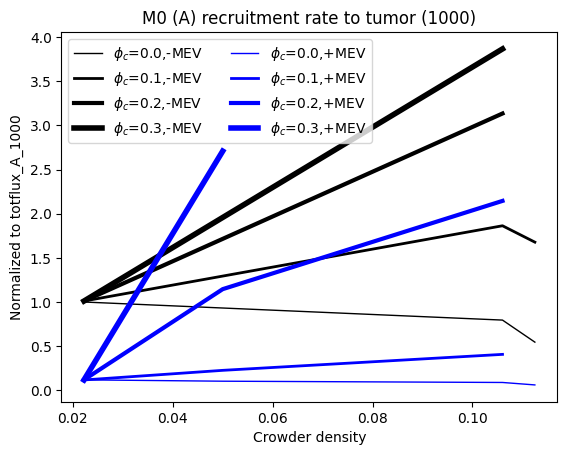

In [82]:
# get reference value
df = nomev
key = 'totflux_A_1000'
ref = df[(df['crowder_potential'] == 0) & (df['free_vol_fraction']>0.96)]
referenceFlux = np.asarray( ref[key] )[0]
print(referenceFlux)

PlotCase(nomev,key,title="No MEV",referenceFlux=referenceFlux,tag="-MEV")
PlotCase(wmev,key,title="w MEV",referenceFlux=referenceFlux,color='b',tag="+MEV")
plt.legend(loc=0,ncol=2)
plt.title("M0 (A) recruitment rate to tumor (1000)")
plt.gcf().savefig("m0_tumorrecruit.png",dpi=300)


-0.004223


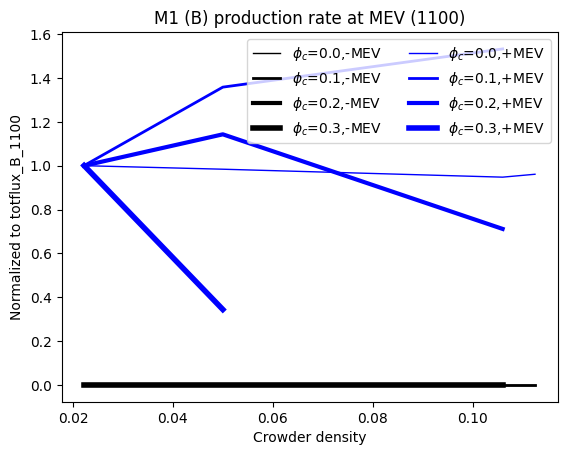

In [81]:
# get reference value
df = wmev
key = 'totflux_B_1100'
ref = df[(df['crowder_potential'] == 0) & (df['free_vol_fraction']>0.96)]
referenceFlux = np.asarray( ref[key] )[0]
print(referenceFlux)

PlotCase(nomev,key,title="No MEV",referenceFlux=referenceFlux,tag="-MEV")
PlotCase(wmev,key,title="w MEV",referenceFlux=referenceFlux,color='b',tag="+MEV")
plt.legend(loc=0,ncol=2)
plt.title("M1 (B) production rate at MEV (1100)")
plt.gcf().savefig("mev_M1_production.png",dpi=300)



0.058394


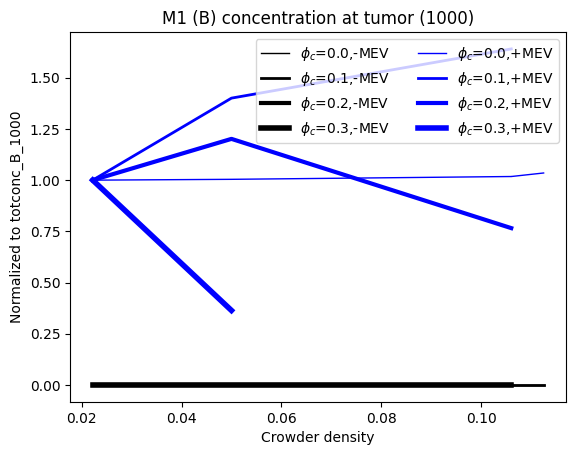

In [83]:
# get reference value
df = wmev
key = 'totconc_B_1000'
ref = df[(df['crowder_potential'] == 0) & (df['free_vol_fraction']>0.96)]
referenceFlux = np.asarray( ref[key] )[0]
print(referenceFlux)

PlotCase(nomev,key,title="No MEV",referenceFlux=referenceFlux,tag="-MEV")
PlotCase(wmev,key,title="w MEV",referenceFlux=referenceFlux,color='b',tag="+MEV")
plt.legend(loc=0,ncol=2)
plt.title("M1 (B) concentration at tumor (1000)")
plt.gcf().savefig("m1_at_tumor.png",dpi=300)
